In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as pyplot
import numpy as np

#**Assignment 2: Convolutional Neural Network**

##**Data**

Data: CIFAR-10

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 **color images** containing one of 10 object classes, with 6000 images per class.

Labels are as follows:

airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9)

Source: https://www.kaggle.com/c/cifar-10

### Q1. This dataset has been included in **keras.datasets.cifar10**. Please load the dataset and print the shape of training and testing sets.

In [3]:
# load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
# print the shape of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (50000, 32, 32, 3) (50000, 1)
Testing set shape: (10000, 32, 32, 3) (10000, 1)


### Q2. Convert the target labels (y) into the one-hot format and show the value (y) for the first instance of the training dataset.

In [4]:
# convert target labels to one-hot format
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=10)
# show the value for the first instance of the training dataset
print("First instance of training labels (one-hot):", y_train_one_hot[0])

First instance of training labels (one-hot): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Q3. Create a validation dataset using the first 5,000 instances in the training dataset. Also, divide all input features (X values) in the train/test/validation sets by 255.0. Please show the y value for the first instance of the validation dataset.

In [5]:
# create validation dataset
X_val = X_train[:5000] / 255.0
y_val = y_train_one_hot[:5000]
X_train = X_train[5000:] / 255.0
y_train_one_hot = y_train_one_hot[5000:]
X_test = X_test / 255.0
# show the y value for the first instance of the validation dataset
print("First instance of validation labels (one-hot):", y_val[0])

First instance of validation labels (one-hot): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **Model**

### Q4. Create a convolutional neural network with 32 kernels of size 3 by 3 in the first layer and 64 kernels of size 3 by 3 in the second layer. We need a max pooling layer wth the size of 2 after each convolution layer. After flattening the feature maps add a fully-connected layer with 128 nodes for the final prediction. Please print the model summary.

### Please note that the input images are color images with the shape of **32 * 32 * 3**. Here 3 shows RGB.

In [ ]:
# create the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 pooling1 (MaxPooling2D)     (None, 16, 16, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 64)        18496     
                                                                 
 pooling2 (MaxPooling2D)     (None, 8, 8, 64)          0         
                                                                 
 flat (Flatten)              (None, 4096)              0         
                                                                 
 fully-connected (Dense)     (None, 128)               524416    
                                                                 
 output (Dense)              (None, 10)               

### Q5. Create an Adam optimizer with a learning rate of 0.001, compile the model, and fit it on the training and validation datasets. Use the following hyperparameters: **batch_size=512, epochs=5**.

### *Hint*: Adam optimizer can be imported by **keras.optimizers.Adam(learning_rate=0.001)**

Epoch 1/5
88/88 [==============================] - 68s 768ms/step - loss: 1.8177 - accuracy: 0.3522 - val_loss: 1.5299 - val_accuracy: 0.4560
Epoch 2/5
88/88 [==============================] - 78s 879ms/step - loss: 1.4220 - accuracy: 0.4950 - val_loss: 1.3158 - val_accuracy: 0.5382
Epoch 3/5
88/88 [==============================] - 69s 789ms/step - loss: 1.2663 - accuracy: 0.5542 - val_loss: 1.1966 - val_accuracy: 0.5814
Epoch 4/5
88/88 [==============================] - 68s 770ms/step - loss: 1.1651 - accuracy: 0.5928 - val_loss: 1.1605 - val_accuracy: 0.5882
Epoch 5/5
88/88 [==============================] - 69s 789ms/step - loss: 1.1095 - accuracy: 0.6159 - val_loss: 1.0957 - val_accuracy: 0.6164


## **Performance**

### Q6. Evaluate your model.

313/313 [==============================] - 5s 16ms/step - loss: 1.1123 - accuracy: 0.6086


[1.1122761964797974, 0.6086000204086304]

## **Post-analysis**

### Q7. Print the name of layers.

#### Note: You may choose any name you like for your layers.

['conv1', 'pooling1', 'conv2', 'pooling2', 'flat', 'fully-connected', 'output']

### Q8. Print the output of layers.

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'pooling1')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'pooling2')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'flat')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'fully-connected')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output')>]

### Q9. Print the output shape of feature maps in the convolution layers as well as the pooling layers for the fifth instance in your test dataset.

(1, 32, 32, 32)
(1, 16, 16, 32)
(1, 16, 16, 64)
(1, 8, 8, 64)


The frog image below should be your fifth testing instance (index=4).

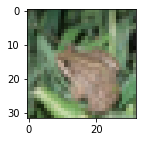

### Q10. Draw 16 feature maps for each convolution and pooling layer.

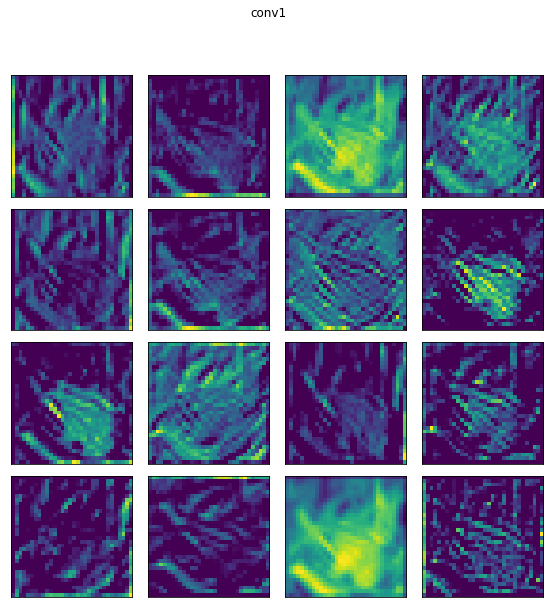

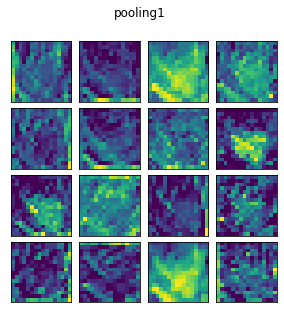

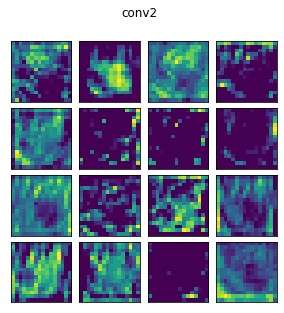

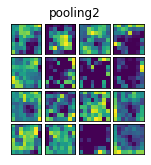